# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Input the 2019 Dataset
df = pd.read_csv('2019_data.csv')

/Users/nathanielyzer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Display import
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Context,Local Authority District code (2019),Local Authority District name (2019),Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,...,NaN,E07000224,Arun,"0,054","0,058","0,055","0,069","30,435",2572,154.414
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294


In [4]:
# Drop required values that contain NAN
df.dropna(subset=['LSOA code', 'Month', 'Location', 'Crime type', 'Longitude', 'Latitude'], inplace=True)

# Crime Type Prediction

In [5]:
# Encode Desired Values to integers to use in models
ohe = LabelEncoder()
df['E LSOA code'] = ohe.fit_transform(df['LSOA code'].dropna().values)
df['E Month'] = ohe.fit_transform(df['Month'].dropna().values)
df['E Location'] = ohe.fit_transform(df['Location'].dropna().values)

In [6]:
# Create an X and Y
X = df[['E LSOA code', 'E Month', 'E Location', 'Longitude', 'Latitude']].values
Y = df['Crime type'].values

In [7]:
# Fit Decision Tree on Crime Types and split the dataset in training and data.
clf = tree.DecisionTreeClassifier(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [8]:
# Predictions on Test Set
preds = clf.predict(X_test)

In [9]:
# Predictions in a Dataframe
df_preds = pd.DataFrame()
df_preds['y'] = y_test
df_preds['pred'] = preds

In [10]:
# Accuracy
len(df_preds.loc[df_preds['y'] == df_preds['pred']]) / len(y_test)

0.2799220594361894

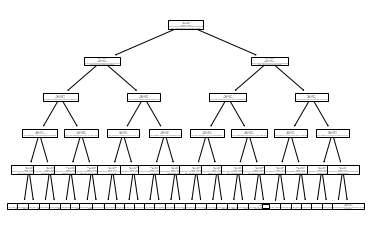

In [69]:
# Plot the Decision Tree
tree.plot_tree(clf);

# Predicting Amount of Crimes

In [12]:
# Create a Dataframe to have the amount of crimes per LSOA per month.
df_count = df[['E LSOA code', 'Month', 'Crime type', ]].groupby(['E LSOA code','Month']).count().sort_index()

In [13]:
# Compute past crime values
df_count['1 Month Ago'] = df_count.groupby(level=0)['Crime type'].shift(1)
df_count['2 Months Ago'] = df_count.groupby(level=0)['Crime type'].shift(2)
df_count.dropna(inplace=True)
df_count

Crime type  1 Month Ago  2 Months Ago
E LSOA code Month                                         
0           2019-03          16         21.0          20.0
            2019-04          26         16.0          21.0
            2019-05          32         26.0          16.0
            2019-06          31         32.0          26.0
            2019-07          46         31.0          32.0
...                         ...          ...           ...
13229       2019-08           8          7.0          11.0
            2019-09           5          8.0           7.0
            2019-10           8          5.0           8.0
            2019-11           3          8.0           5.0
            2019-12           7          3.0           8.0

[122393 rows x 3 columns]

In [14]:
# Fit a Decision Tree on 1 month vs 2 months on all values.
X1 = df_count.reset_index()[['E LSOA code', '1 Month Ago']].values
X2 = df_count.reset_index()[['E LSOA code', '2 Months Ago']].values
y = df_count.reset_index()['Crime type'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.1, random_state=42)
clf1 = tree.DecisionTreeClassifier(max_depth=5)
clf2 = tree.DecisionTreeClassifier(max_depth=5)
clf1.fit(X1_train, y1_train)
clf2.fit(X2_train, y2_train)
preds1 = clf1.predict(X1_test)
preds2 = clf2.predict(X2_test)
df_preds1 = pd.DataFrame()
df_preds1['y'] = y1_test
df_preds1['pred'] = preds1
df_preds2 = pd.DataFrame()
df_preds2['y'] = y2_test
df_preds2['pred'] = preds2
acc1 = np.mean(abs(df_preds1['y'] - df_preds1['pred']))
acc2 = np.mean(abs(df_preds2['y'] - df_preds2['pred'])) 
acc1, acc2

(5.682271241830065, 5.838888888888889)

In [15]:
df_preds2

,y,pred
0,5,10
1,3,7
2,26,20
3,6,6
4,5,6
...,...,...
12235,18,8
12236,12,9
12237,11,11
12238,9,8


In [16]:
# Create Dataframe
df_count = df[['Reported by','E LSOA code', 'Month', 'Crime type', ]].groupby(['Reported by','E LSOA code','Month']).count().sort_index()
df_count['1 Month Ago'] = df_count.groupby(level=1)['Crime type'].shift(1)
df_count['2 Months Ago'] = df_count.groupby(level=1)['Crime type'].shift(2)
df_count.dropna(inplace=True)
df_count

Crime type  1 Month Ago  \
Reported by          E LSOA code Month                              
Bedfordshire Police  4999        2019-03           8          8.0   
                                 2019-04           8          8.0   
                                 2019-05           4          8.0   
                                 2019-06           6          4.0   
                                 2019-07           7          6.0   
...                                              ...          ...   
Thames Valley Police 13119       2019-08          13         14.0   
                                 2019-09          10         13.0   
                                 2019-10          25         10.0   
                                 2019-11          14         25.0   
                                 2019-12           8         14.0   

                                          2 Months Ago  
Reported by          E LSOA code Month                  
Bedfordshire Police  4999        2019-03           8.0  
                                 2019-04           8.0  
                                 2019-05           8.0  
                                 2019-06           8.0  
                                 2019-07           4.0  
...                                                ...  
Thames Valley Police 13119       2019-08           9.0  
                                 2019-09          14.0  
                                 2019-10          13.0  
                                 2019-11          10.0  
                                 2019-12          25.0  

[126899 rows x 3 columns]

In [17]:
# Fit a Decision Tree on 1 month vs 2 months on all values.
X1 = df_count.reset_index()[['E LSOA code', '1 Month Ago']].values
X2 = df_count.reset_index()[['E LSOA code', '2 Months Ago']].values
y = df_count.reset_index()['Crime type'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.1, random_state=42)
clf1 = tree.DecisionTreeClassifier(max_depth=5)
clf2 = tree.DecisionTreeClassifier(max_depth=5)
clf1.fit(X1_train, y1_train)
clf2.fit(X2_train, y2_train)
preds1 = clf1.predict(X1_test)
preds2 = clf2.predict(X2_test)
df_preds1 = pd.DataFrame()
df_preds1['y'] = y1_test
df_preds1['pred'] = preds1
df_preds2 = pd.DataFrame()
df_preds2['y'] = y2_test
df_preds2['pred'] = preds2
# acc1 = np.mean(abs(df_preds1['y'] - df_preds1['pred']))
# acc2 = np.mean(abs(df_preds2['y'] - df_preds2['pred'])) 
# acc1, acc2

In [38]:
# Get all the Areas
areas = df_count.index.get_level_values(0).unique()

In [61]:
# Fit a Decision Tree on all Areas and Compute Mean Absolute Error
MAE = []
df_results = pd.DataFrame(columns= ['Area', 'y', 'Prediction'])
for area in areas:
    df = df_count.loc[area, :]
    X2 = df.reset_index()[['E LSOA code', '2 Months Ago', '1 Month Ago']].values
    y = df.reset_index()['Crime type'].values
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.1, random_state=42)
    clf2 = tree.DecisionTreeClassifier(max_depth=5)
    clf2.fit(X2_train, y2_train)
    preds2 = clf2.predict(X2_test)
    df_preds2 = pd.DataFrame(columns= ['Area', 'y', 'Prediction'])
    df_preds2['y'] = y2_test
    df_preds2['Area'] = area
    df_preds2['Prediction'] = preds2
    df_results = df_results.append(df_preds2, ignore_index=True)
    MAE.append(np.mean(abs(df_preds2['y'] - df_preds2['Prediction'])))
MAE

[5.57742782152231,
 79.13333333333334,
 5.902867715078631,
 4.441226575809199,
 5.728531855955679,
 6.1344537815126055,
 7.014943215780036,
 4.700394218134035,
 5.267045454545454,
 4.2113074204947]

In [63]:
# Display Results
df_results.set_index(['Area','y'], inplace=True)
df_results

In [68]:
areas[1]

'City of London Police'

In [67]:
df_results.loc[areas[1],:]

,Prediction
y,
1,2
20,28
547,30
12,2
2,1
82,30
1,2
2,2
4,2
